This Notebook includes the training of Pytorch. The code was collected from various resource, mainly from the code examples in the book "Machine Learning with PyTorch and Scikit-Learn". I highly recommend this book to anyone who wants to learn Pytorch and how this framework is applied to build a variety of deep learning algorithms and architectures.
This notebook only contains the basic data creation and manipulation operations in Pytorch.

In [1]:
import torch
import torchvision
import numpy as np
from typing import List, Tuple, Dict, Optional
import os
import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import Image as IPythonImage
%matplotlib inline
from PIL import Image
from itertools import islice

### Check pytorch version and GPU

In [2]:
# check pytorch version
print(torch.__version__)

1.10.0


In [3]:
# check availability of GPU
torch.cuda.is_available()

True

## Data manipulations

### create tensor and move tensor to GPU

In [4]:
# create tensor from python list
a = torch.tensor([1, 2,3])

# create tensor from numpy array
b = torch.from_numpy(np.array([4, 5, 6], dtype=np.int32))

# check if a and b are tensors
print(f"a is a tensor? {torch.is_tensor(a)}, b is a tensor? {torch.is_tensor(b)}, [1, 2, 3] is a tensor? {torch.is_tensor([1, 2, 3])}")
                     
# move data to GPU
t_a = a.to("cuda")
print(t_a.device)

a is a tensor? True, b is a tensor? True, [1, 2, 3] is a tensor? False
cuda:0


In [5]:
# create matrix with all ones
t_ones = torch.ones(2, 3)
print(t_ones.shape)
print(t_ones)

torch.Size([2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [6]:
# create matrix with random numbers between 0-1
rand_tensor = torch.rand(2, 3)
print(rand_tensor)

tensor([[1.8152e-01, 6.8322e-01, 3.2926e-04],
        [8.6882e-01, 1.9061e-01, 5.3579e-01]])


### Data type conversion and data reshape

In [7]:
# convert data types
print(t_a.dtype)
t_a_32 = t_a.to(dtype=torch.int32)
print(t_a_32.dtype)

torch.int64
torch.int32


In [8]:
# reshape tensors
t_rand = torch.rand(3, 5)
print(t_rand.shape)
t_trans = torch.transpose(t_rand, 0,1)
print(t_trans.shape)
t_trans_d = t_rand.transpose(0,1)
print(t_trans_d.shape)

torch.Size([3, 5])
torch.Size([5, 3])
torch.Size([5, 3])


In [9]:
# reshape 
t_30 = torch.zeros(30)
print(t_30.shape)
t_2d = t_30.reshape(5, 6)
print(t_2d.shape)

torch.Size([30])
torch.Size([5, 6])


In [10]:
# squeez dimensions with 1 length
t = torch.zeros(1, 2, 1, 4, 1)
t_sqz = torch.squeeze(t, 2)
print(t_sqz.shape)


torch.Size([1, 2, 4, 1])


In [11]:
t = torch.zeros(1, 2, 1, 4, 1)
print((t.squeeze(2)).shape)

torch.Size([1, 2, 4, 1])


### Mathematic Operations

In [12]:
# element wise multiplication
torch.manual_seed(1)

t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))
torch.multiply(t1, t2)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])

In [13]:
# can directly use multiplication for element wise mutliplication
t1 * t2

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])

In [14]:
# mean by rows
print(t1)
print(torch.mean(t1, axis = 0))

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
tensor([-0.1373,  0.2028])


In [15]:
# calculate norms of vectors
t1 = 2 * torch.rand(5, 2) - 1
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
print(norm_t1)

# confirm with the basic numpy calculations
np.sqrt(np.sum(np.square(t1.numpy()), axis=1))

tensor([0.9888, 1.1251, 1.0662, 0.8938, 0.6317])


array([0.98883855, 1.1251004 , 1.0661523 , 0.89377034, 0.6317484 ],
      dtype=float32)

#### Matrix multiplications

In [16]:
# matrix multiplication
## 2d 
a, b = torch.randn(2, 3), torch.randn(3, 4)
print(torch.mm(a, b))

## general
print(torch.matmul(a, b))

## shortcut
print(a @ b)

## batch multiply
a_10, b_10 = torch.rand(10, 2, 3), torch.rand(10, 3, 4)
print(torch.bmm(a_10, b_10))

tensor([[ 7.5794,  7.8557,  2.6000,  0.1969],
        [-2.3473, -2.9862, -0.8868,  0.6451]])
tensor([[ 7.5794,  7.8557,  2.6000,  0.1969],
        [-2.3473, -2.9862, -0.8868,  0.6451]])
tensor([[ 7.5794,  7.8557,  2.6000,  0.1969],
        [-2.3473, -2.9862, -0.8868,  0.6451]])
tensor([[[0.7833, 0.7736, 0.2781, 0.5898],
         [0.7341, 0.5860, 0.2325, 0.2428]],

        [[0.7755, 0.8712, 0.8660, 0.8654],
         [0.3736, 0.4501, 0.8102, 0.5087]],

        [[0.3094, 0.9500, 0.7587, 1.1253],
         [0.2236, 0.6206, 0.4886, 0.7784]],

        [[0.5701, 0.5467, 0.2520, 0.6662],
         [0.7210, 0.6761, 0.6574, 0.9779]],

        [[0.5742, 1.4258, 1.0155, 0.3469],
         [0.2324, 0.7676, 0.2330, 0.1445]],

        [[1.7220, 1.3072, 1.8454, 0.7160],
         [1.5538, 1.0315, 1.6123, 0.7156]],

        [[1.0675, 0.9403, 0.8996, 1.3185],
         [1.2590, 1.5004, 1.5686, 2.1199]],

        [[0.2977, 0.3437, 0.1474, 0.1633],
         [0.9753, 0.8564, 0.5183, 0.9660]],

        [[0.7968,

### Split, stack, and concatenate tensors
  + both torch.chunk and torch.split split input tensors on the first dimension
  + torch.chunk chop input tensors on first dimensions to the specified chunks
  + torch.split split input tensors on first dimensions based on split size specified in split_size_or_sections argument

#### chunk and split

In [17]:
# chop tensor into specified chunks
t = torch.rand(8)
print(t)

t_splits = torch.chunk(t, 3)

[item.numpy() for item in t_splits]

tensor([0.7884, 0.8074, 0.4710, 0.4384, 0.9544, 0.9371, 0.2165, 0.9892])


[array([0.7883692 , 0.8073671 , 0.47102225], dtype=float32),
 array([0.43844873, 0.9543726 , 0.9370644 ], dtype=float32),
 array([0.21651089, 0.9891938 ], dtype=float32)]

In [18]:
t = torch.rand(5, 2)
print(t)

t_splits = torch.chunk(t, 3)

[item.numpy() for item in t_splits]

tensor([[0.6237, 0.1679],
        [0.7737, 0.1267],
        [0.9620, 0.1786],
        [0.6414, 0.6523],
        [0.6189, 0.9147]])


[array([[0.62373626, 0.16786957],
        [0.77370626, 0.12671274]], dtype=float32),
 array([[0.9619643 , 0.17856044],
        [0.641414  , 0.6522501 ]], dtype=float32),
 array([[0.61892897, 0.9147111 ]], dtype=float32)]

In [19]:
# split
t = torch.rand(5)
print(t)

t_splits = torch.split(t, split_size_or_sections=[3, 2])
 
[item.numpy() for item in t_splits]

tensor([0.2923, 0.2889, 0.0667, 0.4795, 0.2631])


[array([0.29232526, 0.28891486, 0.06671429], dtype=float32),
 array([0.47948015, 0.26313972], dtype=float32)]

In [20]:
t = torch.rand(5, 3)
print(t)

t_splits = torch.split(t, split_size_or_sections= (2, 3))
 
[item.numpy() for item in t_splits]

tensor([[0.5200, 0.3975, 0.6659],
        [0.9325, 0.6475, 0.3389],
        [0.2547, 0.0639, 0.9207],
        [0.4053, 0.6009, 0.5185],
        [0.1814, 0.7816, 0.7802]])


[array([[0.5200346 , 0.39750075, 0.66589683],
        [0.93253815, 0.6475391 , 0.3389299 ]], dtype=float32),
 array([[0.2546519 , 0.06392348, 0.92072344],
        [0.40527993, 0.60092753, 0.51849556],
        [0.18136644, 0.7815907 , 0.78020936]], dtype=float32)]

#### concat and stack
  + concat doesn't generate new dimensions. input tensors must have matching dimensions except for the concat dimension
  + stack generate new dimensions. input tensors must match in all shapes

In [21]:
# concat tensors
# dimension maintained to 1 X 5 from 1 X 3 and 1 X 2. Always 1 dimension vectors for both input and output tensors
A = torch.ones(3)
B = torch.zeros(2)

C = torch.cat([A, B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


In [22]:
# dimension increased from 3 X 1, 3 X 1 to 3 X 2
A = torch.ones(3)
B = torch.zeros(3)

S = torch.stack([A, B], axis=1)
print(S)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


In [23]:
# dimension increased from 1 X 3, 1 X 3 to 2 X 3
A = torch.ones(3)
B = torch.zeros(3)

S = torch.stack([A, B], axis=0)
print(S)

tensor([[1., 1., 1.],
        [0., 0., 0.]])


## Building input pipelines in Pytorch

### Create a Dataloader from existing tensors

In [24]:
# load tensors to a dataloader and traverse
from torch.utils.data import DataLoader
t = torch.arange(6, dtype=torch.float32)

loader = DataLoader(t)

for item in loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [25]:
# assign batch_size to loader
loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(loader, 1):
    print(f"batch {i} is {batch}")

batch 1 is tensor([0., 1., 2.])
batch 2 is tensor([3., 4., 5.])


### Build DataSet from tensors
#### build Dataset class and instantiate Dataset objects from tensor data

In [26]:
# build Dataset
from torch.utils.data import Dataset
# create feature matrix and labels
t_x, t_y = torch.rand(6, 3), torch.rand(6)

class JointDataset(Dataset):
    def __init__(self, t_x, t_y):
        self.x = t_x
        self.y = t_y

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return len(self.x)

joint_data = JointDataset(t_x, t_y)

for item in joint_data:
    print(item)

(tensor([0.2143, 0.2210, 0.4254]), tensor(0.3251))
(tensor([0.3560, 0.6227, 0.3686]), tensor(0.8046))
(tensor([0.4337, 0.3092, 0.0431]), tensor(0.7882))
(tensor([0.9361, 0.5954, 0.9471]), tensor(0.6846))
(tensor([0.4194, 0.3743, 0.0299]), tensor(0.4010))
(tensor([0.3102, 0.8279, 0.0103]), tensor(0.4621))


#### travese dataset items by Dataloader

In [27]:
joint_data_loader = DataLoader(joint_data, batch_size = 2, drop_last=False)
for i, batch in enumerate(joint_data_loader):
    print(f"batch {i}: {batch}")

batch 0: [tensor([[0.2143, 0.2210, 0.4254],
        [0.3560, 0.6227, 0.3686]]), tensor([0.3251, 0.8046])]
batch 1: [tensor([[0.4337, 0.3092, 0.0431],
        [0.9361, 0.5954, 0.9471]]), tensor([0.7882, 0.6846])]
batch 2: [tensor([[0.4194, 0.3743, 0.0299],
        [0.3102, 0.8279, 0.0103]]), tensor([0.4010, 0.4621])]


#### Shuffle batches for each epoch
  + data loader shuffle the samples in each batch in each epoch
  + each epoch will traverse all the samples once
  + batch size is critical for use cases where the gradient descent update is at the threshold values to "vibrate" around the cost function

In [28]:
joint_data_loader = DataLoader(joint_data, batch_size=2, drop_last=False, shuffle=True)
for epoch in range(3):
    print(f"epoch is {epoch + 1}")
    for i, batch in enumerate(joint_data_loader, 1):
        print(f"batch {i} {batch}")

epoch is 1
batch 1 [tensor([[0.4194, 0.3743, 0.0299],
        [0.3560, 0.6227, 0.3686]]), tensor([0.4010, 0.8046])]
batch 2 [tensor([[0.9361, 0.5954, 0.9471],
        [0.4337, 0.3092, 0.0431]]), tensor([0.6846, 0.7882])]
batch 3 [tensor([[0.3102, 0.8279, 0.0103],
        [0.2143, 0.2210, 0.4254]]), tensor([0.4621, 0.3251])]
epoch is 2
batch 1 [tensor([[0.3560, 0.6227, 0.3686],
        [0.9361, 0.5954, 0.9471]]), tensor([0.8046, 0.6846])]
batch 2 [tensor([[0.3102, 0.8279, 0.0103],
        [0.4337, 0.3092, 0.0431]]), tensor([0.4621, 0.7882])]
batch 3 [tensor([[0.4194, 0.3743, 0.0299],
        [0.2143, 0.2210, 0.4254]]), tensor([0.4010, 0.3251])]
epoch is 3
batch 1 [tensor([[0.3560, 0.6227, 0.3686],
        [0.4194, 0.3743, 0.0299]]), tensor([0.8046, 0.4010])]
batch 2 [tensor([[0.3102, 0.8279, 0.0103],
        [0.4337, 0.3092, 0.0431]]), tensor([0.4621, 0.7882])]
batch 3 [tensor([[0.9361, 0.5954, 0.9471],
        [0.2143, 0.2210, 0.4254]]), tensor([0.6846, 0.3251])]


### Build dataset and dataloader from files
#### Demonstrate reading image files and show images (Without Converting to Torch.tensor)

In [29]:
# build dataloader from cat_dog_images folder
from pathlib import Path

image_path = Path('..\data\cat_dog_images')

image_files = [str(file) for file in image_path.glob("*.jpg")]
image_files.sort()

for file in image_files:
    print(file)

..\data\cat_dog_images\cat-01.jpg
..\data\cat_dog_images\cat-02.jpg
..\data\cat_dog_images\cat-03.jpg
..\data\cat_dog_images\dog-01.jpg
..\data\cat_dog_images\dog-02.jpg
..\data\cat_dog_images\dog-03.jpg


#### Traverse and display images

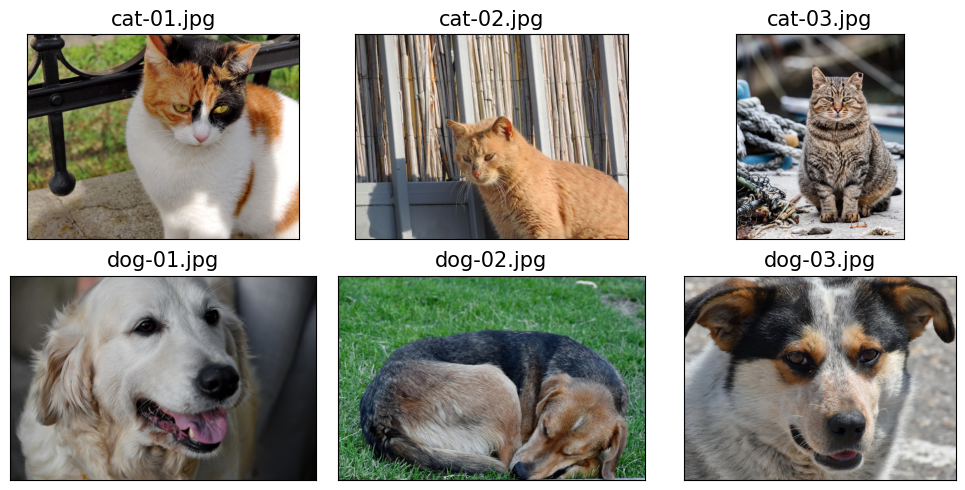

In [30]:
import matplotlib.pyplot as plt
from IPython.display import Image as IPythonImage
%matplotlib inline
from PIL import Image
import os

fig = plt.figure(figsize = (10, 5))

for i, file in enumerate(image_files):
    image = Image.open(file)

    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]), ax.set_yticks([])
    ax.imshow(image)
    ax.set_title(Path(file).name, size=15)

plt.tight_layout()
plt.show()
    
    

In [31]:
# get labels list
labels = [1 if 'dog' in Path(file).name else 0 for file in image_files]

In [32]:
labels

[0, 0, 0, 1, 1, 1]

#### Build Dataset and Dataloader to load image files with transformation (transform to torch.tensor)
  + transforms.ToTensor converts the input to tensors between 0 and 1.
  + transfroms.ToTensor also format image files to C, H, W
  + to show images in PIL.Image and imshow in matplotlib, need to convert it back to H, W, C

In [33]:
from torch.utils.data import Dataset, DataLoader
class ImageDataSet(Dataset):
    def __init__(self, file_list, labels, transform):
        self.files = file_list
        self.labels = labels
        self.transform = transform

    def __getitem__(self, idx):
        img = Image.open(self.files[idx])
        if self.transform:
            img = self.transform(img)

        return img, self.labels[idx]

    def __len__(self):
        return len(self.labels)

    

In [34]:
## set transform
import torchvision.transforms as transforms
height, width = 80, 120
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((height, width))
])

# build image dataset
image_dataset = ImageDataSet(image_files, labels, transform)

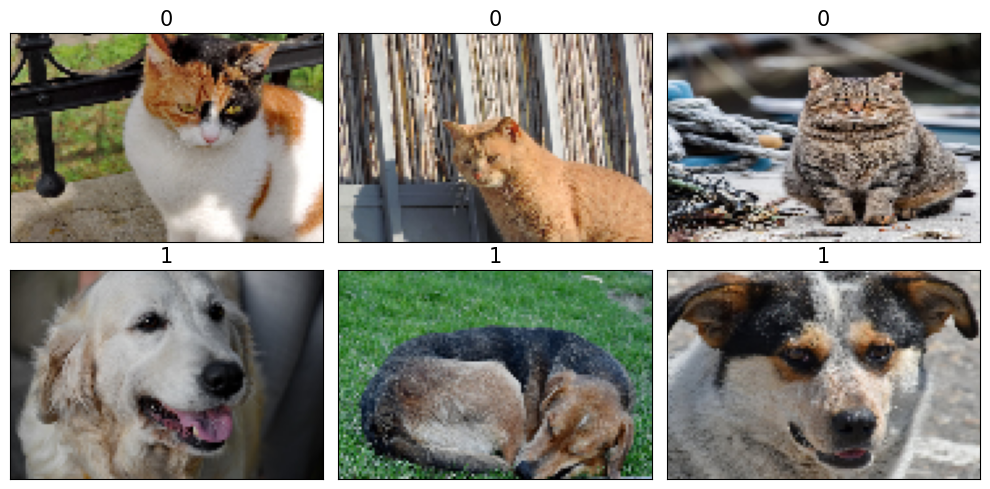

In [35]:
# convert images back to H, W, C to show in PIL and matplotlib
fig = plt.figure(figsize=(10, 5))

for i, example in enumerate(image_dataset, 1):
    #img = Image.open(img[0])

    # change the dimensions to H, W, C for matplotlib
    # also clips the data range to be between 0 and 1
    img = example[0].permute(1, 2, 0).clamp(min=0, max=1)
    ax = fig.add_subplot(2, 3, i)
    ax.set_xticks([]), ax.set_yticks([])
    ax.imshow(img)

    # add labels as title
    ax.set_title(str(example[1]), size=15)

plt.tight_layout()
plt.show()
    

#### Download celeba dataset and annotations

In [36]:
from pathlib import Path
image_path = Path('..\data\celeba\img_align_celeba')

image_files = [str(file) for file in image_path.glob("*.jpg")]

# string names of files
image_files.sort()

labels_df = pd.read_csv('..\data\celeba\list_eval_partition.txt', delimiter=" ", header=None, names=["image_name", "label"])
labels = list(labels_df.label)

In [37]:
## set transform
import torchvision.transforms as transforms
height, width = 80, 120
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((height, width))
])

# build image dataset
image_dataset = ImageDataSet(image_files, labels, transform)

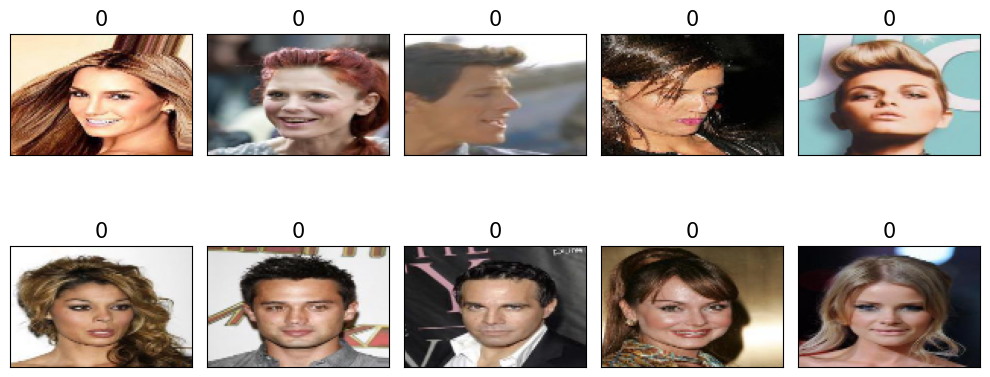

In [38]:
# convert images back to H, W, C to show in PIL and matplotlib
fig = plt.figure(figsize=(10, 5))

for i, example in islice(enumerate(image_dataset, 1), 10):
    #img = Image.open(img[0])

    # change the dimensions to H, W, C for matplotlib
    # also clips the data range to be between 0 and 1
    img = example[0].permute(1, 2, 0).clamp(min=0, max=1)
    ax = fig.add_subplot(2, 5, i)
    ax.set_xticks([]), ax.set_yticks([])
    ax.imshow(img)

    # add labels as title
    ax.set_title(str(example[1]), size=15)

plt.tight_layout()
plt.show()

#### Download file from torchvision

In [39]:
print(os.getcwd())

C:\Users\huang\Documents\yuanML\Deep_Learning_Technique\pytorch


In [40]:
image_path = "..\data"
mnist_dataset = torchvision.datasets.MNIST(image_path, 'train', download=False)

In [41]:
assert isinstance(mnist_dataset, torch.utils.data.Dataset)

(<PIL.Image.Image image mode=L size=28x28 at 0x2659F2A4E50>, 5)


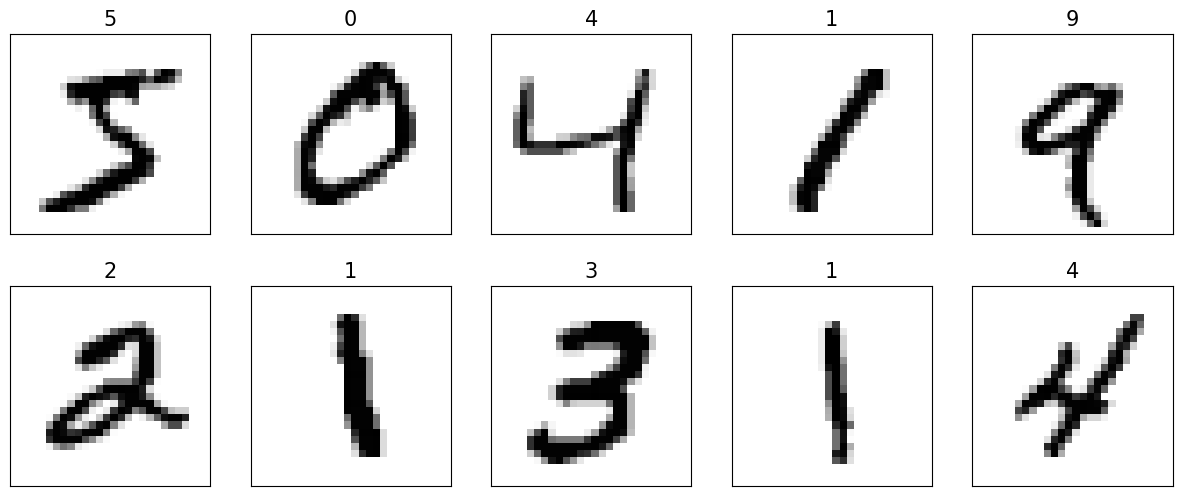

In [42]:
example = next(iter(mnist_dataset))
print(example)

fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)

#plt.savefig('figures/12_06.pdf')
plt.show()

## Build a Neural Netwok Model

### build a linear regression model 
#### construct training data and a simple linear layer using torch.nn

In [43]:
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from torch.optim import Adam, SGD

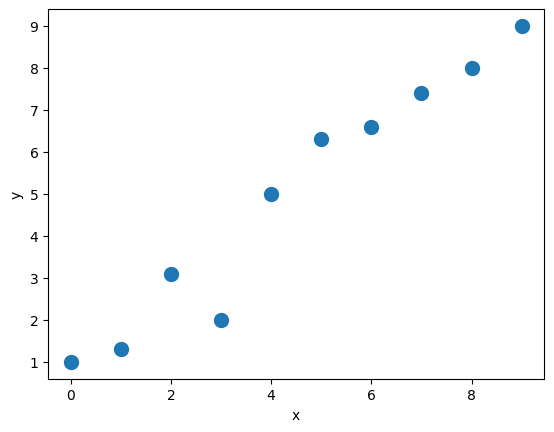

In [44]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 
                    7.4, 8.0, 9.0], dtype='float32')

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('figures/12_07.pdf')
plt.show()

In [45]:
norm_X_train = (X_train - np.mean(X_train))/np.std(X_train) 
norm_X_train_tensor = torch.from_numpy(norm_X_train)
y_train_tensor = torch.from_numpy(y_train)

In [46]:
class NN_Dataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [47]:
nn_dataset = NN_Dataset(norm_X_train_tensor, y_train_tensor)
nn_dataloader = DataLoader(nn_dataset)

In [48]:
for item in nn_dataloader:
    print(item)

[tensor([[-1.5667]]), tensor([1.])]
[tensor([[-1.2185]]), tensor([1.3000])]
[tensor([[-0.8704]]), tensor([3.1000])]
[tensor([[-0.5222]]), tensor([2.])]
[tensor([[-0.1741]]), tensor([5.])]
[tensor([[0.1741]]), tensor([6.3000])]
[tensor([[0.5222]]), tensor([6.6000])]
[tensor([[0.8704]]), tensor([7.4000])]
[tensor([[1.2185]]), tensor([8.])]
[tensor([[1.5667]]), tensor([9.])]


#### build model using nn.Liear and train model using SGD

In [49]:
linear_model = nn.Linear(1, 1)
loss_fun = nn.MSELoss()
optimizer = SGD(linear_model.parameters(), lr=0.001)
num_epochs = 200
log_epochs = 10

In [50]:
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(nn_dataloader, 1):
        loss = loss_fun(y, linear_model(x))
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    if epoch % log_epochs == 0:
            print(f"epoch: {epoch}, batch: {i}, loss: {loss.item():.4f}")    

C:\Users\huang\anaconda3\envs\gpu_text\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 0, batch: 10, loss: 70.3243
epoch: 10, batch: 10, loss: 46.5964
epoch: 20, batch: 10, loss: 30.7953
epoch: 30, batch: 10, loss: 20.2879
epoch: 40, batch: 10, loss: 13.3130
epoch: 50, batch: 10, loss: 8.6931
epoch: 60, batch: 10, loss: 5.6415
epoch: 70, batch: 10, loss: 3.6326
epoch: 80, batch: 10, loss: 2.3161
epoch: 90, batch: 10, loss: 1.4579
epoch: 100, batch: 10, loss: 0.9027
epoch: 110, batch: 10, loss: 0.5468
epoch: 120, batch: 10, loss: 0.3215
epoch: 130, batch: 10, loss: 0.1813
epoch: 140, batch: 10, loss: 0.0963
epoch: 150, batch: 10, loss: 0.0465
epoch: 160, batch: 10, loss: 0.0191
epoch: 170, batch: 10, loss: 0.0056
epoch: 180, batch: 10, loss: 0.0005
epoch: 190, batch: 10, loss: 0.0004


#### build test dataset and visualize the regression 

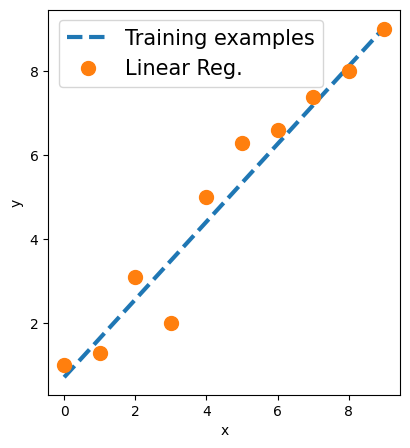

In [51]:
# build X_test, normalize the dataset and predict y_test
X_test = np.linspace(0, 9, 100, dtype=np.float32).reshape(-1, 1)
norm_X_test = (X_test - np.mean(X_train))/np.std(X_train)
norm_X_test_tensor = torch.from_numpy(norm_X_test)
y_test = linear_model(norm_X_test_tensor).detach().numpy()

# visualize x_test, y_test
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_test, y_test, '--', lw=3)
plt.plot(X_train, y_train, 'o', markersize=10)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.tick_params(axis='both', which='major', labelsize=10)

#### build regression model using tensors
  + you can use either mannual updates of weight and bias or using SGD to update weight and bias
  + when using SGD, remember to call optimizer.zero_grad() first and then calculate loss, loss.backward() and optimizer.step()
  + to manually update grad of weight and bias, you have to first call loss.backward() to activate the grads

In [52]:
import torch
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)
 
def loss_fn(input, target):
    return (input-target).pow(2).mean()

def model(xb):
    return xb @ weight + bias

learning_rate = 0.001
num_epochs = 200
log_epochs = 10

# train model
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(nn_dataloader, 1):
        loss = loss_fn(y, model(x))
        loss.backward()

        with torch.no_grad():
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate
            weight.grad.zero_()
            bias.grad.zero_()
    if epoch % log_epochs == 0:
            print(f"epoch: {epoch}, batch: {i}, loss: {loss.item():.4f}") 
            print(f"weight: {weight}, bias: {bias}") 

epoch: 0, batch: 10, loss: 126.6059
weight: tensor([-1.4508], requires_grad=True), bias: tensor([0.0988], requires_grad=True)
epoch: 10, batch: 10, loss: 84.1025
weight: tensor([-0.6971], requires_grad=True), bias: tensor([0.9848], requires_grad=True)
epoch: 20, batch: 10, loss: 55.7622
weight: tensor([-0.0801], requires_grad=True), bias: tensor([1.7097], requires_grad=True)
epoch: 30, batch: 10, loss: 36.8853
weight: tensor([0.4251], requires_grad=True), bias: tensor([2.3027], requires_grad=True)
epoch: 40, batch: 10, loss: 24.3281
weight: tensor([0.8387], requires_grad=True), bias: tensor([2.7878], requires_grad=True)
epoch: 50, batch: 10, loss: 15.9883
weight: tensor([1.1773], requires_grad=True), bias: tensor([3.1847], requires_grad=True)
epoch: 60, batch: 10, loss: 10.4604
weight: tensor([1.4545], requires_grad=True), bias: tensor([3.5094], requires_grad=True)
epoch: 70, batch: 10, loss: 6.8056
weight: tensor([1.6814], requires_grad=True), bias: tensor([3.7750], requires_grad=True

In [53]:
import torch
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)
 
def loss_fn(input, target):
    return (input-target).pow(2).mean()

def model(xb):
    return xb @ weight + bias

learning_rate = 0.001
num_epochs = 200
log_epochs = 10
optimizer = torch.optim.SGD([weight, bias], lr=0.001)

# train model
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(nn_dataloader, 1):
        optimizer.zero_grad()
        loss = loss_fn(y, model(x))
        loss.backward()
        optimizer.step()
        
    if epoch % log_epochs == 0:
            print(f"epoch: {epoch}, batch: {i}, loss: {loss.item():.4f}") 
            print(f"weight: {weight}, bias: {bias}") 

epoch: 0, batch: 10, loss: 74.6886
weight: tensor([0.2034], requires_grad=True), bias: tensor([0.0987], requires_grad=True)
epoch: 10, batch: 10, loss: 49.5041
weight: tensor([0.6565], requires_grad=True), bias: tensor([0.9842], requires_grad=True)
epoch: 20, batch: 10, loss: 32.7301
weight: tensor([1.0275], requires_grad=True), bias: tensor([1.7086], requires_grad=True)
epoch: 30, batch: 10, loss: 21.5733
weight: tensor([1.3314], requires_grad=True), bias: tensor([2.3014], requires_grad=True)
epoch: 40, batch: 10, loss: 14.1653
weight: tensor([1.5803], requires_grad=True), bias: tensor([2.7864], requires_grad=True)
epoch: 50, batch: 10, loss: 9.2569
weight: tensor([1.7841], requires_grad=True), bias: tensor([3.1833], requires_grad=True)
epoch: 60, batch: 10, loss: 6.0132
weight: tensor([1.9511], requires_grad=True), bias: tensor([3.5080], requires_grad=True)
epoch: 70, batch: 10, loss: 3.8769
weight: tensor([2.0878], requires_grad=True), bias: tensor([3.7737], requires_grad=True)
epoc

### Build a multiple layer Neural Network for Iris dataset

In [54]:
# load dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 

iris = load_iris()
X = iris['data']
y = iris['target']
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1./3, random_state=1)

In [55]:
# establish dataset and dataloader
from torch.utils.data import DataLoader, TensorDataset

X_train_norm = (X_train - X_train.mean()) / np.std(X_train) 
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)

X_train_ds = TensorDataset(X_train_norm, y_train)

batch_size = 2

X_train_dl = DataLoader(X_train_ds, batch_size=batch_size, shuffle=True)


In [56]:
# build model
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)

        return x

In [57]:
# define model training settings
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
epoch_num = 100

loss_hist = [0] * epoch_num
accuracy_hist = [0] * epoch_num

model = Model(input_size, hidden_size, output_size)
learning_rate = 0.001


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [58]:
for epoch in range(epoch_num):
    for x_batch, y_batch in X_train_dl:
        y_size = y_batch.size(0)
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()
        loss_hist[epoch] += loss.item() * y_size
        accuracy = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += accuracy.sum()

    loss_hist[epoch] /= X_train_norm.shape[0]
    accuracy_hist[epoch] /= X_train_norm.shape[0]

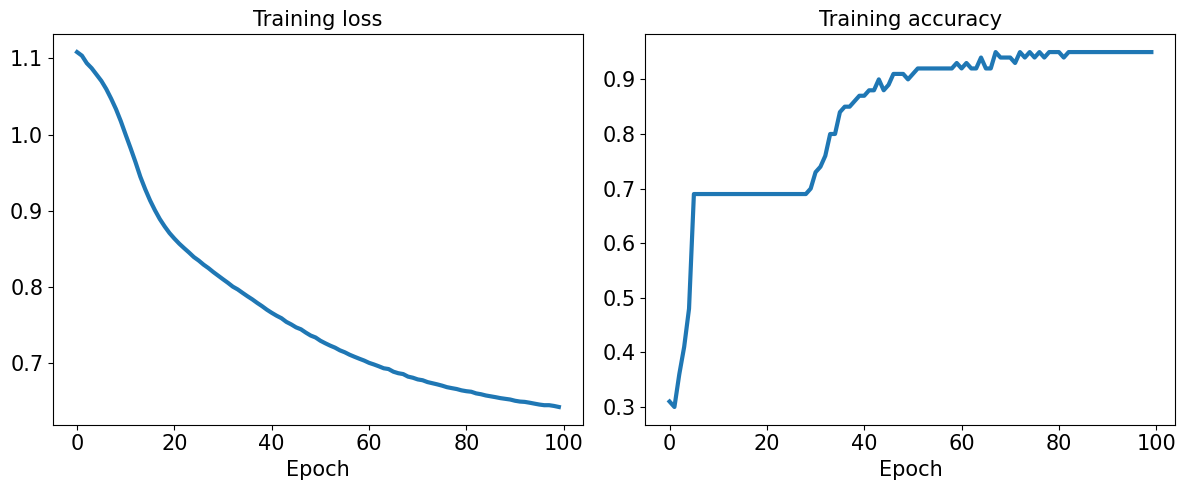

In [59]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

plt.show()

In [60]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test) 
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
 
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


### Save models with architecture or parameters

#### Save entire model

In [61]:
# save the entire model and reload
pth = "iris_classifier_NN.pt"
torch.save(model, pth)

new_model = torch.load(pth)
new_model.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [62]:
pred_y = new_model(X_test_norm)

accuracy = (torch.argmax(pred_y, dim=1) == y_test).float().mean()
print(accuracy)

tensor(0.9800)


#### Save model parameters

In [64]:
param_pth = "iris_classifier_param.pt"
torch.save(model.state_dict(), param_pth)

smodel = Model(input_size, hidden_size, output_size)
smodel.load_state_dict(torch.load(param_pth))

pred_y = smodel(X_test_norm)

accuracy = (torch.argmax(pred_y, dim=1) == y_test).float().mean()
print(accuracy)

tensor(0.9800)
